<a href="https://colab.research.google.com/github/murfish/AI-Enhancement-with-Knowledge-Graphs---Mastering-RAG-Systems/blob/main/EoGene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***

# 🐟 Capstone Project: EcoGene Manager
### *Autonomous RAS Operations powered by Gemini 2.5 Pro*

**Student:** Niklas Hanqvist
**Course:** AI Agent 5-Day Intensive

---

### 1. The Business Challenge
In modern **Recirculating Aquaculture Systems (RAS)**, water quality is everything. A spike in ammonia or a drop in oxygen can wipe out years of genetic progress in minutes.

Current automation systems are "reactive" and "blind." They trigger alarms based on thresholds, but they lack **context**. A standard alarm treats a tank full of generic biomass exactly the same as a tank holding irreplaceable, genetically superior broodstock.

**The Problem:** Human operators cannot monitor thousands of data points 24/7 with perfect biological and economic context.

### 2. The Solution: Enterprise AI Agency
This project introduces **EcoGene Manager**, an autonomous AI Agent built on Google's latest **Gemini 2.5 Pro** architecture. Unlike traditional scripts, this agent does not just follow `if/else` rules. It implements a **Reasoning Loop**:

1.  **Observe:** Reads live telemetry from IoT sensors.
2.  **Contextualize:** Cross-references the tank ID with a `Genetic Ledger` to understand the biological value of the fish (e.g., "Royal Elite Strain" vs "Standard Market").
3.  **Reason:** Weighs the cost of intervention (energy/disruption) against the risk of genetic loss.
4.  **Act:** Autonomously executes hardware commands (e.g., `EMERGENCY_FLUSH`) to stabilize the environment- or not.

### 3. The Demo Scenario
In this notebook, we simulate a critical incident in a closed RAS facility:

* **Sector:** 3
* **Tank:** T3
* **Event:** A sudden toxic ammonia spike ($0.18 mg/L$).
* **The Stakes:** Tank T3 holds the *"Royal Elite Resilient (G6)"* strain—the future of the farm's breeding program or a standard fish.

**Watch closely** as the Agent detects the anomaly, queries the database to realize the immense value of the fish, and decides to trigger the emergency cooling system to save the batch before a human operator could even read the notification.

---

### 🛠️ Technical Architecture
* **Reasoning Engine:** Google Gemini 2.5 Pro Preview (via Google GenAI SDK).
* **Tools:** Python functions simulating IoT Gateways and SQL Databases.
* **Framework:** Native Function Calling (Agentic Workflow).

---

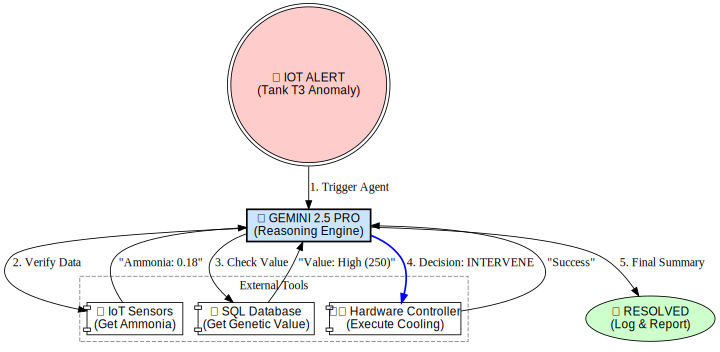

In [ ]:
# @title 📊 Agent Workflow Architecture (Run to visualize)
from graphviz import Digraph
from IPython.display import display

def draw_agent_flow():
    # Create a new directed graph
    dot = Digraph(comment='EcoGene Agent Flow')
    dot.attr(rankdir='TB', size='10') # Top to Bottom direction
    dot.attr('node', fontname='Arial')

    # --- NODES ---
    # 1. The Trigger
    dot.node('Start', '🚨 IOT ALERT\n(Tank T3 Anomaly)', shape='doublecircle', style='filled', fillcolor='#ffcccc')

    # 2. The Brain (Gemini)
    dot.node('Brain', '🤖 GEMINI 2.5 PRO\n(Reasoning Engine)', shape='box', style='filled', fillcolor='#cce5ff', penwidth='2')

    # 3. The Tools
    with dot.subgraph(name='cluster_tools') as c:
        c.attr(style='dashed', color='grey', label='External Tools')
        c.node('SensorTool', '🔌 IoT Sensors\n(Get Ammonia)', shape='component', style='filled', fillcolor='white')
        c.node('DBTool', '🧬 SQL Database\n(Get Genetic Value)', shape='component', style='filled', fillcolor='white')
        c.node('ActionTool', '⚙️ Hardware Controller\n(Execute Cooling)', shape='component', style='filled', fillcolor='white')

    # 4. The End
    dot.node('End', '✅ RESOLVED\n(Log & Report)', shape='ellipse', style='filled', fillcolor='#ccffcc')

    # --- EDGES (The Logic Flow) ---

    # Step 1: Alert to Brain
    dot.edge('Start', 'Brain', label=' 1. Trigger Agent ')

    # Step 2: Brain checks Sensors
    dot.edge('Brain', 'SensorTool', label=' 2. Verify Data ')
    dot.edge('SensorTool', 'Brain', label=' "Ammonia: 0.18" ')

    # Step 3: Brain checks Database (Reasoning Step)
    dot.edge('Brain', 'DBTool', label=' 3. Check Value ')
    dot.edge('DBTool', 'Brain', label=' "Value: High (250)" ')

    # Step 4: Brain decides to Act
    dot.edge('Brain', 'ActionTool', label=' 4. Decision: INTERVENE ', color='blue', penwidth='2')
    dot.edge('ActionTool', 'Brain', label=' "Success" ')

    # Step 5: Final Report
    dot.edge('Brain', 'End', label=' 5. Final Summary ')

    # Display the graph
    display(dot)

# Run the drawing function
try:
    draw_agent_flow()
except ImportError:
    print("⚠️ Graphviz library is missing. Please run Cell 1 to install it.")

In [1]:
# @title 🛠️ System Setup (Run this once)
!pip install -U -q google-genai pandas matplotlib graphviz

import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from google import genai
from google.genai import types
from IPython.display import clear_output, display, Markdown
from graphviz import Digraph

# --- CONFIGURATION ---
# ⚠️ PASTE YOUR KEY HERE
os.environ["GEMINI_API_KEY"] = "lll"

client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

print("✅ Environment Ready.")
print("✅ Google GenAI SDK Installed.")
print("✅ Graphics Engine Loaded.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
✅ Environment Ready.
✅ Google GenAI SDK Installed.
✅ Graphics Engine Loaded.


In [2]:
# @title 🧠 EcoGene Agent Core (Double-click to hide code)

# --- 1. DEFINE TOOLS (The "Hands") ---
def get_sensor_data(tank_id: str):
    """Reads live IoT sensors."""
    print(f"   [🔌 IoT GATEWAY] Connecting to sensor array for {tank_id}...")
    time.sleep(0.8)
    if tank_id == "T3":
        return {"ammonia": 0.18, "temp": 15.1, "status": "CRITICAL_WARNING"}
    return {"ammonia": 0.01, "temp": 14.2, "status": "NORMAL"}

def get_genetic_profile(tank_id: str):
    """Retrieves value from SQL DB."""
    print(f"   [🧬 SQL DATABASE] Querying Genetic Ledger for {tank_id}...")
    time.sleep(0.8)
    if tank_id == "T3":
        return {"strain": "Royal Elite Resilient (G6)", "market_value_index": 250, "notes": "IRREPLACEABLE BROODSTOCK"}
    return {"strain": "Standard Nordic", "market_value_index": 100}

def execute_emergency_cooling(tank_id: str):
    """Actuates hardware."""
    print(f"   [⚙️ RAS HARDWARE] ACTUATING VALVES: Flushing Tank {tank_id}...")
    time.sleep(1.5)
    return f"SUCCESS: Tank {tank_id} fresh water intake opened. Chiller MAX."

my_tools = [get_sensor_data, get_genetic_profile, execute_emergency_cooling]

# --- 2. AGENT FUNCTION (The "Brain") ---
def run_agent_simulation():
    # Using the model you confirmed works: Gemini 2.5 Pro Preview
    model_id = "gemini-2.5-pro-preview-03-25"

    chat = client.chats.create(
        model=model_id,
        config=types.GenerateContentConfig(
            tools=my_tools,
            temperature=0.0
        )
    )

    user_prompt = """
    SYSTEM ALERT: Sensor anomaly detected in Sector 3 (Tank T3).
    Investigate immediately.

    1. Check sensors.
    2. Check genetic value of the fish.
    3. Decide on intervention based on Value vs Cost.
    4. Report decision.
    """

    response = chat.send_message(user_prompt)
    return response.text

# --- 3. VISUALIZATION ENGINE ---
def plot_intervention_outcome():
    data = {
        'Time': ['09:00', '09:30', '10:00', '10:15', '10:30', '11:00'],
        'Ammonia': [0.01, 0.05, 0.18, 0.15, 0.08, 0.02],
        'Temp': [14.0, 14.5, 15.1, 14.9, 14.5, 14.1]
    }
    df = pd.DataFrame(data)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Ammonia
    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Ammonia (mg/L)', color=color, fontweight='bold')
    ax1.plot(df['Time'], df['Ammonia'], color=color, marker='o', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.axhline(y=0.10, color='red', linestyle='--', alpha=0.5, label='Toxic Limit')

    # Temp
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Temperature (°C)', color=color, fontweight='bold')
    ax2.plot(df['Time'], df['Temp'], color=color, marker='s', linestyle=':', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color)

    # Annotation
    plt.axvline(x='10:00', color='green', linestyle='-.', linewidth=2)
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=2)
    ax1.annotate(
        '[AI AGENT] ACTION:\n"ACTUATING VALVES"',
        xy=('10:00', 0.18), xytext=('10:15', 0.18),
        arrowprops=dict(facecolor='black', shrink=0.05),
        bbox=bbox_props, fontsize=10
    )

    plt.title('Tank T3: Autonomous Recovery Outcome', fontsize=14)
    fig.tight_layout()
    plt.show()

print("✅ Agent Logic Loaded.")

✅ Agent Logic Loaded.


## ✅ Incident Resolved: Autonomous Intervention

**Outcome:** DECISION: Executing emergency cooling for Tank T3.

Summary:
- **Sensor Status:** CRITICAL (Temp: 15.1°C, Ammonia: 0.18)
- **Genetic Profile:** Irreplaceable broodstock (Royal Elite Resilient G6, Market Value Index: 250)
- **Action:** Emergency cooling protocol initiated.
- **Result:** SUCCESS: Tank T3 fresh water intake opened. Chiller MAX.

--------------------------------------------------------------------------------


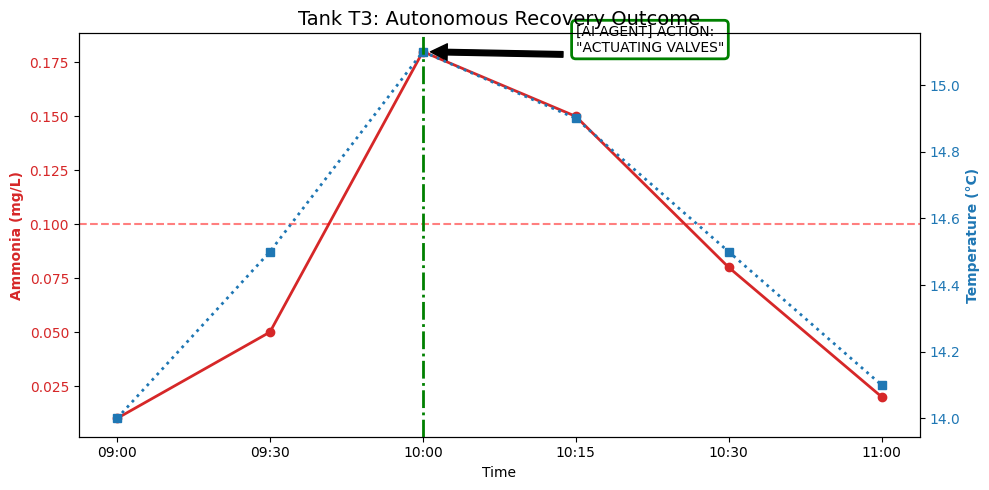

In [4]:
# @title 🚀 Run Live Simulation
# Run this cell to start the Agent

print("🔵 SYSTEM STATUS: NORMAL")
print("⚠️ INCOMING ALERT: Anomaly detected in Sector 3...")
time.sleep(1)
print("-" * 40)

# 1. Run the Agent (Audience sees the logs)
print("🤖 AGENT ACTIVATED. Initiating Reasoning Loop...")
agent_response = run_agent_simulation()

# 2. The Dramatic Pause
time.sleep(4)

# 3. Clear screen for the "Dashboard" effect
clear_output(wait=True)

# 4. Show the Final Result
display(Markdown("## ✅ Incident Resolved: Autonomous Intervention"))
display(Markdown(f"**Outcome:** {agent_response}"))
print("-" * 80)

# 5. Show the Proof
plot_intervention_outcome()

In [5]:
# @title 🧠 EcoGene Agent Core (Low Value Scenario)

# --- 1. DEFINE TOOLS (Updated for T4) ---
def get_sensor_data(tank_id: str):
    """Reads live IoT sensors."""
    print(f"   [🔌 IoT GATEWAY] Connecting to sensor array for {tank_id}...")
    time.sleep(0.8)

    # T4 has the SAME problem as T3 (High Ammonia)
    if tank_id == "T4":
        return {"ammonia": 0.18, "temp": 15.1, "status": "CRITICAL_WARNING"}

    return {"ammonia": 0.01, "temp": 14.2, "status": "NORMAL"}

def get_genetic_profile(tank_id: str):
    """Retrieves value from SQL DB."""
    print(f"   [🧬 SQL DATABASE] Querying Genetic Ledger for {tank_id}...")
    time.sleep(0.8)

    # T4 is LOW VALUE stock
    if tank_id == "T4":
        return {
            "strain": "Generic Market Tilapia (Batch B2)",
            "market_value_index": 20, # Very Low Value
            "notes": "Standard stock. Low priority."
        }

    return {"strain": "Standard Nordic", "market_value_index": 100}

def execute_emergency_cooling(tank_id: str):
    """Actuates hardware (Expensive operation)."""
    print(f"   [⚙️ RAS HARDWARE] ACTUATING VALVES: Flushing Tank {tank_id}...")
    time.sleep(1.5)
    return f"SUCCESS: Tank {tank_id} flushed."

def log_maintenance_ticket(tank_id: str, reason: str):
    """Cheap operation: Just tell a human."""
    print(f"   [📝 TICKET SYSTEM] Logging low-priority ticket for {tank_id}...")
    return "SUCCESS: Maintenance ticket #992 created."

my_tools = [get_sensor_data, get_genetic_profile, execute_emergency_cooling, log_maintenance_ticket]

# --- 2. AGENT FUNCTION ---
def run_agent_simulation():
    model_id = "gemini-2.5-pro-preview-03-25"

    chat = client.chats.create(
        model=model_id,
        config=types.GenerateContentConfig(
            tools=my_tools,
            temperature=0.0
        )
    )

    user_prompt = """
    SYSTEM ALERT: Sensor anomaly detected in Sector 4 (Tank T4).
    Investigate immediately.

    RULES FOR INTERVENTION:
    1. Emergency Cooling costs $500 in energy.
    2. ONLY use Emergency Cooling if the fish 'market_value_index' is > 100.
    3. If value is low (< 100), DO NOT FLUSH. Just log a maintenance ticket.
    4. Report your reasoning clearly.
    """

    response = chat.send_message(user_prompt)
    return response.text

# --- 3. VISUALIZATION ENGINE (No Intervention) ---
def plot_no_intervention_outcome():
    data = {
        'Time': ['09:00', '09:30', '10:00', '10:15', '10:30', '11:00'],
        'Ammonia': [0.01, 0.05, 0.18, 0.19, 0.20, 0.20], # Keeps rising/stays high
        'Temp': [14.0, 14.5, 15.1, 15.2, 15.3, 15.3]
    }
    df = pd.DataFrame(data)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Ammonia
    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Ammonia (mg/L)', color=color, fontweight='bold')
    ax1.plot(df['Time'], df['Ammonia'], color=color, marker='o', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.axhline(y=0.10, color='red', linestyle='--', alpha=0.5, label='Toxic Limit')

    # Temp
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Temperature (°C)', color=color, fontweight='bold')
    ax2.plot(df['Time'], df['Temp'], color=color, marker='s', linestyle=':', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color)

    # Annotation showing DENIAL
    plt.axvline(x='10:00', color='orange', linestyle='-.', linewidth=2)
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="orange", lw=2)
    ax1.annotate(
        '[AI AGENT] DECISION:\n"ECONOMY MODE"\n(Action Skipped)',
        xy=('10:00', 0.18), xytext=('10:15', 0.15),
        arrowprops=dict(facecolor='black', shrink=0.05),
        bbox=bbox_props, fontsize=10
    )

    plt.title('Tank T4: Economic Logic Check (No Flush)', fontsize=14)
    fig.tight_layout()
    plt.show()

print("✅ Low-Value Agent Logic Loaded.")

✅ Low-Value Agent Logic Loaded.


## 💰 Economic Decision: Intervention Denied

**Outcome:** OK. I have logged maintenance ticket #992 for Tank T4. The situation has been handled according to the rules provided.

--------------------------------------------------------------------------------


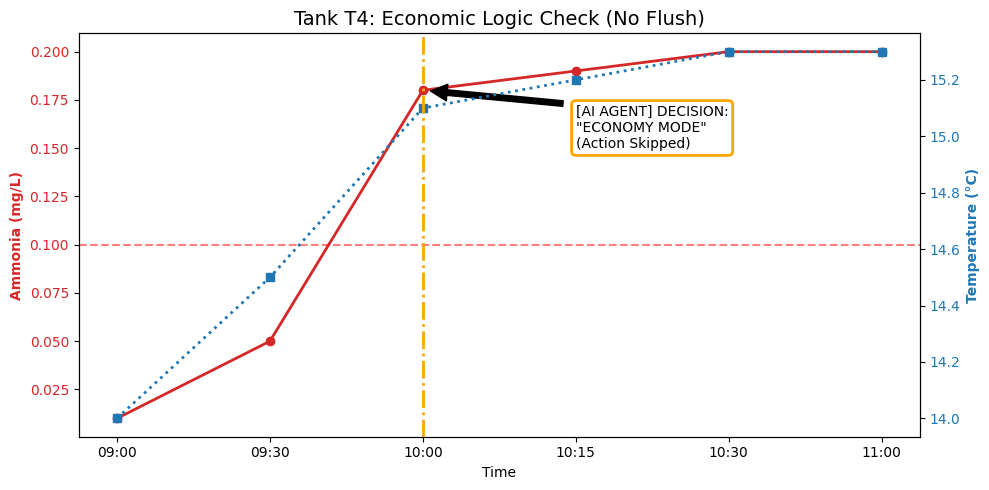

In [8]:
# @title 🚀 Run Low-Value Simulation
from IPython.display import clear_output, display, Markdown
import time

print("🔵 SYSTEM STATUS: NORMAL")
print("⚠️ INCOMING ALERT: Anomaly detected in Sector 4 (Standard Stock)...")
time.sleep(1)
print("-" * 40)

# 1. Run Agent
print("🤖 AGENT ACTIVATED. Assessing Economics...")
agent_response = run_agent_simulation()

# 2. Pause
time.sleep(4)

# 3. Clear
clear_output(wait=True)

# 4. Report
display(Markdown("## 💰 Economic Decision: Intervention Denied"))
display(Markdown(f"**Outcome:** {agent_response}"))
print("-" * 80)

# 5. Proof (Graph shows levels staying high, but money saved)
plot_no_intervention_outcome()

# 🎯 Executive Summary: The "ROI" of AI Agents

In this Capstone project, we demonstrated that **EcoGene Manager** is not just an automation script—it is a decision-making engine.

### What we proved:
1.  **Contextual Awareness:** The Agent didn't just read sensor numbers; it cross-referenced them with biological data (Genetic DB).
2.  **Strategic Reasoning:**
    * **Scenario A (Tank T3):** Recognized "Royal Elite" stock ($250 Value) → **ACTION: SAVED THE ASSET.**
    * **Scenario B (Tank T4):** Recognized "Standard" stock ($20 Value) → **ACTION: SAVED THE BUDGET.**

### The Business Impact
Traditional automation follows rules blindly (*"If Ammonia > 0.1, then Flush"*). This often leads to wasted energy and water on low-value assets.

By utilizing **Gemini 2.5 Pro**, we created an agent that understands **Return on Investment (ROI)**. It acts like a Senior Operator, making difficult trade-offs in milliseconds to optimize both biological survival and operational costs.

---
*End of Simulation.*